# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** K

**Names:**

Mathieu Sauser\
Jérémy Chaverot\
Luca Mouchel\
Heikel Jebali

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.4 PageRank

### 2.4.1 Random Surfer Model

#### Exercise 2.12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx

#### Visualize the toy networks

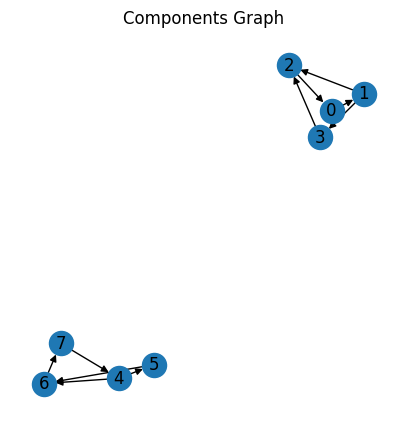

In [2]:
G_comp = nx.read_adjlist('../data/components.graph', create_using=nx.DiGraph())
plt.figure(figsize=(5, 5))
plt.title('Components Graph')
nx.draw(G_comp, with_labels=True)
plt.show()

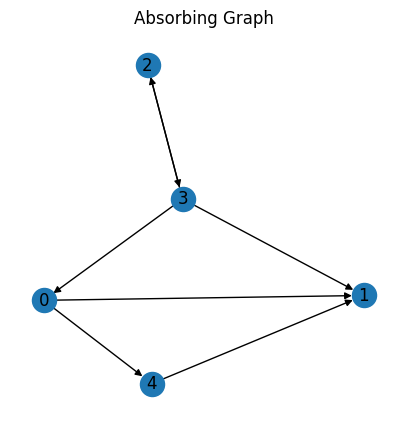

In [3]:
G_absorb = nx.read_adjlist('../data/absorbing.graph', create_using=nx.DiGraph())
plt.figure(figsize=(5, 5))
plt.title('Absorbing Graph')
nx.draw(G_absorb, with_labels=True)
plt.show()

#### Implementation of the Random Surfer model and some utilities functions

In [4]:
def surf(G, currentNode, ranks, maxIter=2000, counter=0):
    """
    Implements the random surfer model.

    Parameters:
        G (nx.DiGraph): The graph to perform random surfer on
        currentNode (int): The current node the random surfer is on
        ranks (dict): A dictionary mapping each node to the number of times it has been visited
        maxIter (int): The maximum number of iterations to perform
        counter (int): Counts the number of iterations performed
    """
    if counter == maxIter:
        return 
        
    ranks[currentNode] += 1
    counter += 1
    try:
        nextNode = random.choice(list(G.neighbors(currentNode)))
    except IndexError:
        print(f'Stuck at node {currentNode} after {counter} iterations')
        return

    surf(G, nextNode, ranks, maxIter, counter)

In [5]:
def pageRankScores(ranks):
    """
    Computes the Page Rank scores given the number of times each node was visited.

    Parameter:
        ranks (dict): Maps each node to the number of times it was visited

    Returns:
       pageRankScores (dict): Maps each nodes to its Page Rank score 
    """
    N = np.sum(list(ranks.values()))
    scores = {node: rank/N for node, rank in ranks.items()}
    
    return scores

In [6]:
def computeScores(G, N=10):
    """
    Computes the Page Rank scores using the random surfer model for several iterations.

    Parameters:
        G (nx.DiGraph): The graph to perform random surfer on
        N (int): The number of iterations to perform
    """
    for i in range(N):
        ranks = {node : 0 for node in G.nodes()}
        startingNode = random.choice(list(G.nodes()))
        print(f':::::Surf number {i+1}:::::\n')
        surf(G, startingNode, ranks)
        scores = pageRankScores(ranks)

        print(f'Initial website: {startingNode}')
        print(f'Number of visits of each website: {ranks}')
        print(f'Page Rank scores: {scores}')
        print('\n----------------------------------------\n')
        

#### Testing on `components.graph`

In [7]:
computeScores(G_comp)

:::::Surf number 1:::::

Initial website: 4
Number of visits of each website: {'0': 0, '1': 0, '2': 0, '3': 0, '4': 576, '5': 273, '6': 576, '7': 575}
Page Rank scores: {'0': 0.0, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.288, '5': 0.1365, '6': 0.288, '7': 0.2875}

----------------------------------------

:::::Surf number 2:::::

Initial website: 3
Number of visits of each website: {'0': 573, '1': 573, '2': 574, '3': 280, '4': 0, '5': 0, '6': 0, '7': 0}
Page Rank scores: {'0': 0.2865, '1': 0.2865, '2': 0.287, '3': 0.14, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0}

----------------------------------------

:::::Surf number 3:::::

Initial website: 6
Number of visits of each website: {'0': 0, '1': 0, '2': 0, '3': 0, '4': 570, '5': 289, '6': 571, '7': 570}
Page Rank scores: {'0': 0.0, '1': 0.0, '2': 0.0, '3': 0.0, '4': 0.285, '5': 0.1445, '6': 0.2855, '7': 0.285}

----------------------------------------

:::::Surf number 4:::::

Initial website: 4
Number of visits of each website: {'0': 0, '1': 

#### Observations on `component.graph`

This graph consists of 2 components hence the set of nodes that can be visited fully depend on the initial node. As we can see we alaways one half of the nodes that have a score of $0$ because it is impossible to reach them if they are not part of the component of the initial node.

We also see that whenever we reach node 6, we have to go to node 7. Hence they always have the same score. Also, the node 4 is at the "center" of this component. By this we mean that any path starting from node 4 will end to this node. So this is always the one with the highest score.

For the second component node 3 is more "isolated" hence it always gets the lowest score as it is harder to reach it and nodes 0 and 2 have the same behavior as nodes 6 and 7 in the first component.

#### Testing on `absorbing.graph`

In [8]:
computeScores(G_absorb)

:::::Surf number 1:::::

Stuck at node 1 after 1 iterations
Initial website: 1
Number of visits of each website: {'0': 0, '1': 1, '4': 0, '2': 0, '3': 0}
Page Rank scores: {'0': 0.0, '1': 1.0, '4': 0.0, '2': 0.0, '3': 0.0}

----------------------------------------

:::::Surf number 2:::::

Stuck at node 1 after 1 iterations
Initial website: 1
Number of visits of each website: {'0': 0, '1': 1, '4': 0, '2': 0, '3': 0}
Page Rank scores: {'0': 0.0, '1': 1.0, '4': 0.0, '2': 0.0, '3': 0.0}

----------------------------------------

:::::Surf number 3:::::

Stuck at node 1 after 3 iterations
Initial website: 0
Number of visits of each website: {'0': 1, '1': 1, '4': 1, '2': 0, '3': 0}
Page Rank scores: {'0': 0.3333333333333333, '1': 0.3333333333333333, '4': 0.3333333333333333, '2': 0.0, '3': 0.0}

----------------------------------------

:::::Surf number 4:::::

Stuck at node 1 after 4 iterations
Initial website: 3
Number of visits of each website: {'0': 1, '1': 1, '4': 1, '2': 0, '3': 1}
Pag

#### Observations on `absorbing.graph

Here we can clearly see that once we reach node 1 we are stuck because it has no outgoing edge.

#### Exercise 2.13

In [9]:
def surf(G, currentNode, ranks, maxIter=2000, counter=0, dampingFactor=0.15):
    """
    Implements the random surfer model. At each iteration there is a probability to jump to a 
    random node. If we are stuck at a node (0-degree node), we jump to a random node.

    Parameters:
        G (nx.DiGraph): The graph to perform random surfer on
        currentNode (int): The current node the random surfer is on
        ranks (dict): A dictionary mapping each node to the number of times it has been visited
        maxIter (int): The maximum number of iterations to perform
        counter (int): Counts the number of iterations performed
        dampingFactor (float): The probability of jumping to a random node
    """
    if counter == maxIter:
        return 
        
    ranks[currentNode] += 1
    counter += 1
    try:
        nextNode = random.choice(list(G.neighbors(currentNode)))
    except IndexError:
        nextNode = random.choice(list(G.nodes()))

    if random.random() <= dampingFactor:
        nextNode = random.choice(list(G.nodes()))

    surf(G, nextNode, ranks, maxIter, counter)

#### Testing the new Random Surfer on `component.graph`

---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

---

### 2.4.3 Gaming the system *(Bonus)*

#### Exercise 2.15 *(Bonus)*